# About

Image and video processing using generated data from Robocode.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import imageio
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import pylab

There are 290 frames.


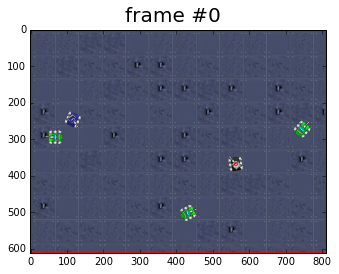

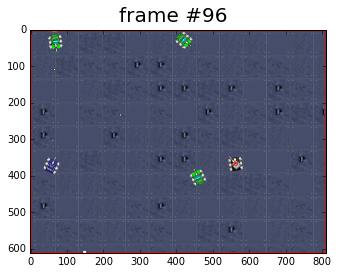

In [2]:
# see http://stackoverflow.com/questions/29718238/how-to-read-mp4-video-to-be-processed-by-scikit-image

filename = 'tanks.ogg'
vid = imageio.get_reader(filename,  'ffmpeg')
n_frames = vid.get_length()
print 'There are %d frames.'%n_frames

# frame numbers to show
nums = [0, n_frames/3]
for num in nums:
    image = vid.get_data(num)
    fig = plt.figure()
    fig.suptitle('frame #{}'.format(num), fontsize=20)
    plt.imshow(image)


In [3]:
image.shape

(612, 812, 3)

## Interactively display frames

Use ipython widgets to interactively show frames

In [4]:
def stack_frames(vid_reader):
    """Take in a video reader, read all the frames and stack them into a list."""
    n = vid_reader.get_length()
    frames = []
    for frame in vid_reader:
        frames.append(frame)
    return frames
    
def show_frame(stack, frame_ind=0):
    #img = vid_reader.get_data(frame_ind)
    img = stack[frame_ind]
    plt.imshow(img)
    plt.title('frame #%d'%frame_ind, fontsize=20)

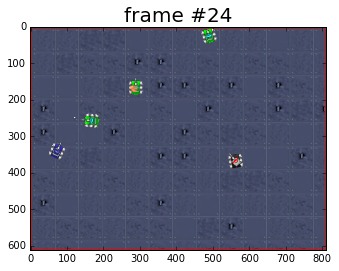

In [5]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display
import ipywidgets as widgets

# This may take some memory
frames = stack_frames(vid)

vs = interactive(show_frame, stack=fixed(frames), frame_ind=(0, n_frames-1));
display(vs)

## Track the blue tank

In [6]:
# Basic image processing in Numpy 
# http://scikit-image.org/docs/stable/user_guide/numpy_images.html

In [7]:
def between(img, lb, ub):
    """Return a logical numpy array showing elements that are in [lb, ub]."""
    return (img >= lb) & (img <= ub)

def get_blue_tank_mask(img):
    # The blue tank has color roughly (r,g,b) = (43, 37, 151)
    blue_tank_mask = between(img[:, :, 0], 30, 60) & \
        between(img[:, :, 1], 30, 60) & between(img[:, :, 2], 140, 180)
    return blue_tank_mask


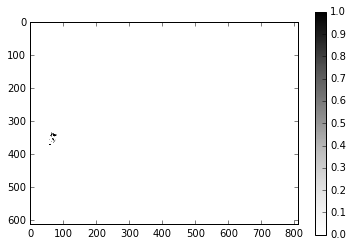

In [8]:
img = frames[77]
#plt.figure(figsize=(10, 6))
blue_tank_mask = get_blue_tank_mask(img)
plt.imshow(blue_tank_mask, cmap=mpl.cm.Greys)
plt.colorbar()

In [9]:
def show_2frames(img1, img2):
    """Show the two images."""
    scale = 1.4
    plt.figure(figsize=(scale*8, scale*6))
    plt.subplot(121)
    plt.imshow(img1)
    plt.subplot(122)
    plt.imshow(img2)
    
def show_2frames_func(f1, f2, index):
    """f1, f2 are function handles such that f: index -> imshow(images[index])."""
    scale = 1.4
    plt.figure(figsize=(scale*8, scale*6))
    plt.subplot(121)
    f1(index)
    plt.subplot(122)
    f2(index)
    
#show_2frames(frames[0], frames[10])

### Interactively show original frames, and the blue tank mask

blue tank at: (x, y) = (62.5, 366)


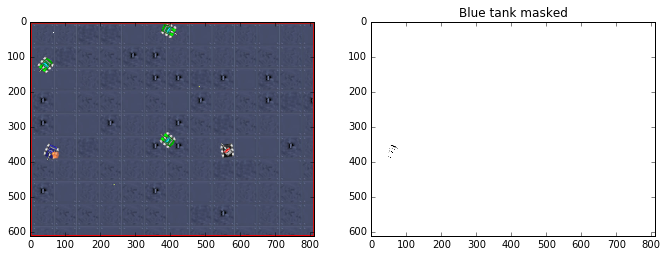

In [10]:
def compare_blue_masked(frame_ind):
    def show_blue_mask(frame_ind):
        blue_mask = get_blue_tank_mask(frames[frame_ind])
        plt.imshow(blue_mask, cmap=mpl.cm.Greys)
        plt.title('Blue tank masked')
        # print coordinate
        mean0 = np.mean(blue_mask, 0)
        mean1 = np.mean(blue_mask, 1)
        x = np.median(np.where(mean0))
        y = np.median(np.where(mean1))
        print 'blue tank at: (x, y) = (%.3g, %.3g)'%(x, y)
        
    show_2frames_func(
        lambda i: plt.imshow(frames[i]), 
        show_blue_mask,
        frame_ind
    )

vs = interactive(compare_blue_masked, frame_ind=(0, n_frames-1));
display(vs)

## Save a video as a sequence of images

In [29]:
import os

#vdo_fname = 'still_1gray'
vdo_fname = 'still_2yellow'
save_folder = vdo_fname
vdo_ext = '.ogg'
vdo_fpath = './' + vdo_fname + vdo_ext
vid = imageio.get_reader(vdo_fpath,  'ffmpeg')
n_frames = vid.get_length()

# frame numbers to show
frame_inds = range(0, n_frames, 50)
for i, num in enumerate(frame_inds):
    image = vid.get_data(num)
    # write img
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    dest_fname = '%s%d.jpg'%(vdo_fname, i)
    save_fpath = os.path.join(save_folder, dest_fname)
    imageio.imwrite(save_fpath, image)

print 'There are %d frames.'%n_frames
print 'Extracted %d frames'%(i+1)

There are 511 frames.
Extracted 11 frames
